### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [62]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [63]:
#1
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')

# Display the first 5 rows
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [64]:
#2
df.info()

#conclusion
print("The dataset contains 10 columns, with no missing values in any column except for race and admission. There are four data types: bool (1), float64 (3), int64 (1), and object (5).")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB
The dataset contains 10 columns, with no missing values in any column except for race and admission. There are four data types: bool (1), float64 (3), int64 (1), and object (5).


3. display the number of each unique value in the race and admission columns (including NaN)

In [65]:
#3a
race_count = df['admission'].value_counts(dropna=False)
print(race_count)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [66]:
#3b
race_count = df['race'].value_counts(dropna=False)
print(race_count)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [67]:
#4
df['admission'].fillna('deny', inplace=True)
df['race'].fillna('other', inplace=True)

<ipython-input-67-12caece74d44>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('deny', inplace=True)
<ipython-input-67-12caece74d44>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

5. recheck missing value

In [68]:
#5
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [69]:
# 6
df = df.drop('application_id', axis=1)

7. show describe column and conclude what the insight is from that column

In [70]:
#7
df.describe()

#conclusion
# Based on the results, the total number of data entries is 6,194 for each column.
# The average GPA is 3.250, GMAT is 651.09, and work experience is 5.0169.
# The standard deviation for GPA is 0.5, for GMAT is 49.294, and for work experience is 1.0324.
# The lowest values are a GPA of 2.65, GMAT of 570.0, and work experience of 1.0.
# 25% of GPA is below 3.105, GMAT is below 610.0, and work experience is below 4.0.
# 50% of the data has a GPA above 3.25 and the other half below 3.25, GMAT is 650.0, and work experience is 5.0.
# 75% of GPA is above 3.350, GMAT is above 680.0, and work experience is 6.0.
# The highest values are a GPA of 3.770, GMAT of 780.0, and work experience of 9.0.

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

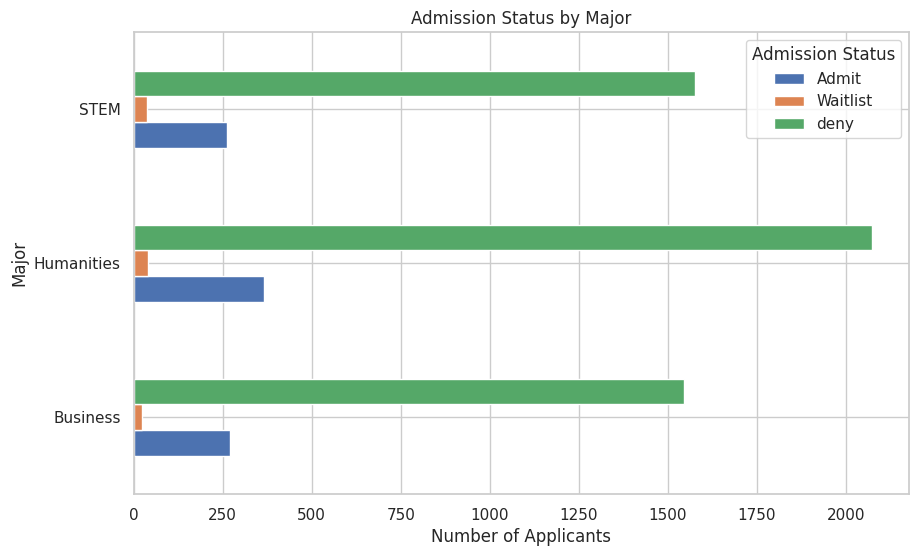

In [71]:
#8
admission_by_major = df.groupby(['major', 'admission'])['admission'].count().unstack()
admission_by_major.plot(kind='barh', figsize=(10,6))
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status')
plt.show()

#conclusion
# From the results of the chart, it can be seen that many students from the Humanities major were rejected.
# However, students from Humanities are also placed on the waiting list more often than other majors.
# Many Humanities students were also accepted.
# Meanwhile, students from STEM and Business majors had a high number of rejections, and the waiting list results were similar.
# For STEM students, more were placed on the waiting list compared to Business students, but not as many as in Humanities.


9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

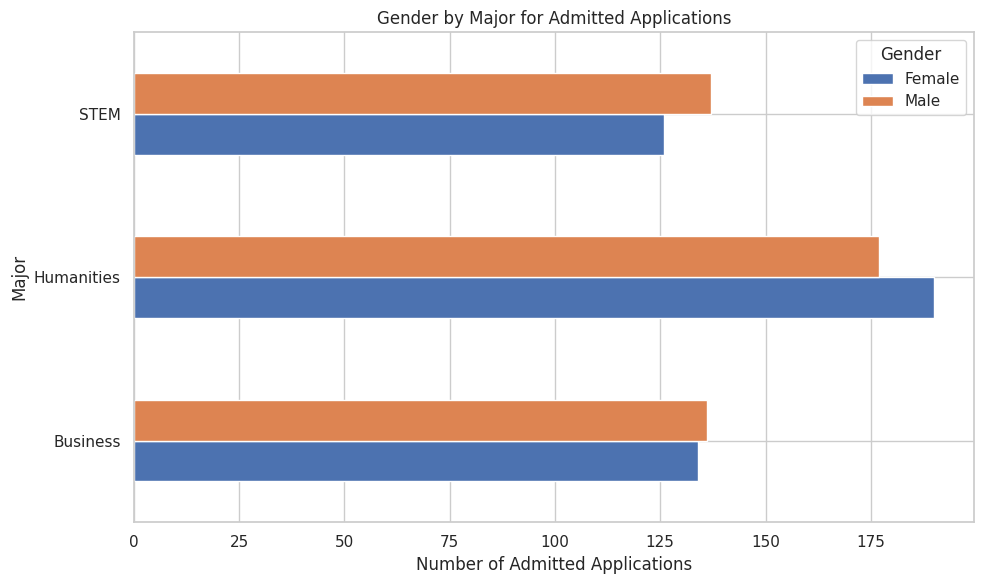

In [72]:
#9
admitted_df = df[df['admission'] == 'Admit']
count_admitted_gender_by_major = admitted_df.groupby(['major', 'gender'])['gender'].count().unstack()
count_admitted_gender_by_major.plot(kind='barh', figsize=(10, 6))
plt.title('Gender by Major for Admitted Applications')
plt.xlabel('Number of Admitted Applications')
plt.ylabel('Major')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()\

#conclusion
# From the gender results, it can be seen that more female students were accepted in Humanities compared to male students, with the number exceeding 175.
# In STEM, there are more male students than female students.
# For Business, more male students were accepted than female students.

10. create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


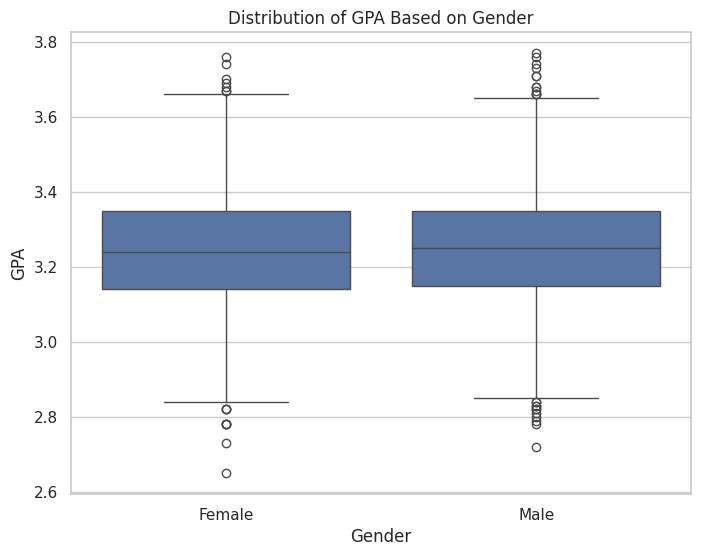

In [73]:
#10
import seaborn as sns

# 1st Visualization: Distribution of GPA based on Gender
plt.figure(figsize=(8,6))
sns.boxplot(x='gender', y='gpa', data=df)
plt.title('Distribution of GPA Based on Gender')
plt.xlabel('Gender')
plt.ylabel('GPA')
plt.show()

#conclusion
# The boxplot reveals that the median GPA for both genders is very similar, slightly above 3.2, indicating that the central tendency of GPA is almost identical between males and females. The interquartile range (IQR) for both genders spans from approximately 3.1 to 3.35, suggesting that 50% of the data falls within this range, with a comparable spread for both groups. The whiskers extend from around 2.8 to 3.6, showing that most GPA values lie within this range for both genders. Outliers are present for both genders, particularly below 2.8 and above 3.6, indicating a few individuals with significantly lower or higher GPA values. Overall, there is no significant difference in the GPA distribution between genders, suggesting that academic performance, as measured by GPA, is relatively balanced between males and females in this dataset.

11. create your own insightful visualization and explain it in at least 2 sentences

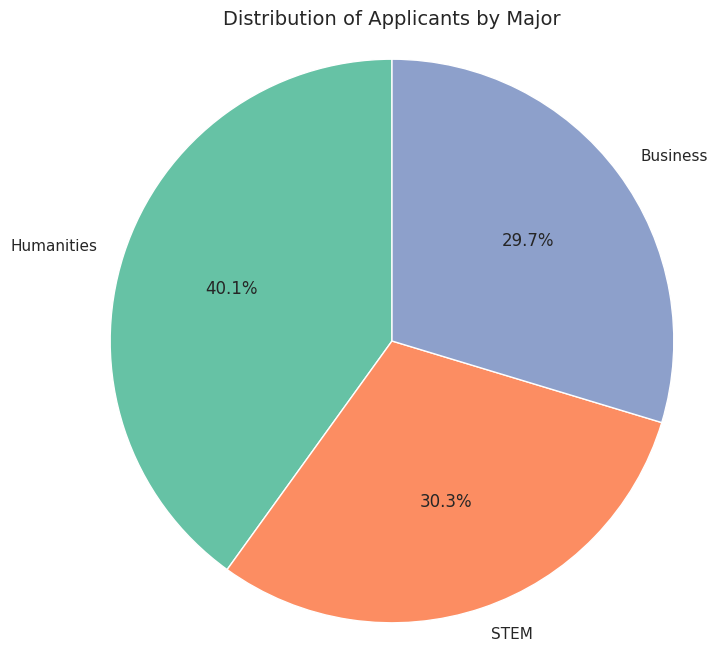

In [74]:
#11
major_counts = df['major'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(major_counts, labels=major_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Distribution of Applicants by Major', fontsize=14)
plt.axis('equal')
plt.show()

#conclusion
# From the visualization results, it can be seen that the Humanities major has the highest percentage compared to other majors.
# Humanities students nearly reach 50% with a percentage of 40.1%, while Business has the lowest percentage at around 29.7%.
# STEM students are in the middle range, with a percentage of approximately 30.3%.







12. encode categorical columns and display the results

In [75]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df['gender'])
df['international'] = encoder.fit_transform(df['international'])
df['major'] = encoder.fit_transform(df['major'])
df['race'] = encoder.fit_transform(df['race'])
df['work_exp'] = encoder.fit_transform(df['work_exp'])
df['work_industry'] = encoder.fit_transform(df['work_industry'])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,Admit
1,1,0,3.28,1,1,680.0,4,6,deny
2,0,1,3.30,0,5,710.0,4,13,Admit
3,1,0,3.47,2,1,690.0,5,13,deny
4,1,0,3.35,2,2,590.0,4,1,deny


In [76]:
#12b
#encode y
df['admission'] = encoder.fit_transform(df['admission'])

df.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,0
1,1,0,3.28,1,1,680.0,4,6,2
2,0,1,3.30,0,5,710.0,4,13,0
3,1,0,3.47,2,1,690.0,5,13,2
4,1,0,3.35,2,2,590.0,4,1,2


13. create a heatmap to see the correlation and explain the conclusion

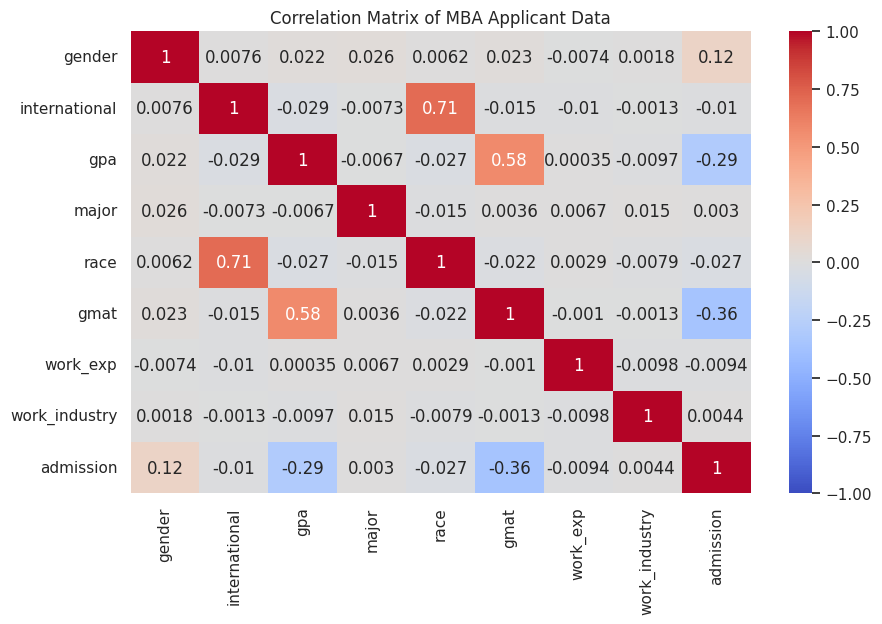

In [77]:
#13
import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix of MBA Applicant Data')

plt.show()

#conclusion
# GPA and GMAT show a moderately strong positive correlation of 0.58. This indicates that applicants with higher GMAT scores tend to also have higher GPAs.
# GPA has a significant negative correlation with admission at -0.29, suggesting that applicants with lower GPAs are more likely to be admitted compared to those with higher GPAs.
# GMAT and admission also have a moderate negative correlation of -0.36, indicating that applicants with lower GMAT scores are more frequently accepted.
# Race and international status exhibit a strong correlation of 0.71, implying a strong relationship between being an international applicant and belonging to certain racial groups (e.g., international applicants may predominantly come from specific races).
# Correlations with other variables like gender, major, and work experience are relatively low (below 0.1), meaning they do not show strong relationships with other variables in this dataset.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [79]:
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = df['admission']
label_encoder = LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

dtree = RandomForestClassifier(n_estimators=200, random_state=42)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

Lisa_data = {
    'gender': 0, 'international': 1, 'gpa' : df['gpa'].mean(), 'major': 0, 'race' : 0, 'gmat' : 580, 'work_exp' : 2, 'work_industry': 3
}
df_lisa = pd.DataFrame([Lisa_data])
predict = dtree.predict(df_lisa)
print("Predicted admission status (encoded): {}".format(predict))

admission = encoder.inverse_transform(predict)

print("The admission status of Lisa is:", admission[0])


Accuracy: 0.8321226795803067
Predicted admission status (encoded): [2]
The admission status of Lisa is: deny
